## Analyse distribution in datasets

In [2]:
import json
import pandas as pd


path_maps = {
    "train": "/home/ubuntu/kiva-iccv/data/train.json",
    "validation": "/home/ubuntu/kiva-iccv/data/validation.json",
}


def load_data_as_df(which: str):
    with open(path_maps[which], "r") as f:
        data = json.load(f)
    return pd.DataFrame.from_dict(data, orient="index")

def analyse(which: str):
    df = load_data_as_df(which)

    print("=" * 50)
    print(f"Analyzing {which}")
    print("=" * 50)

    # start by counting the level 
    level_counts = df["level"].value_counts()
    level_percentages = df["level"].value_counts(normalize=True) * 100
    level_table = pd.DataFrame({
        'Count': level_counts,
        'Percentage': level_percentages
    })

    # count the concepts per level
    concept_counts_by_level = df.groupby(['level', 'concept']).size().reset_index(name='Count')
    concept_counts_by_level['Percentage'] = df.groupby(['level', 'concept']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).values

    # table that counts the transformation_domain per level
    transformation_domain_by_level = df.groupby(['level', 'transformation_domain']).size().reset_index(name='Count')
    transformation_domain_by_level['Percentage'] = df.groupby(['level', 'transformation_domain']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).values

    display(level_table)
    display(concept_counts_by_level)
    display(transformation_domain_by_level)

analyse("train")
analyse("validation")


Analyzing train


,Count,Percentage
level,,
kiva-functions-compositionality,2208,80.232558
kiva-functions,368,13.372093
kiva,176,6.395349


,level,concept,Count,Percentage
0,kiva,Counting+1,16,9.090909
1,kiva,Counting+2,16,9.090909
2,kiva,Counting-1,16,9.090909
3,kiva,Counting-2,16,9.090909
4,kiva,ReflectX,16,9.090909
...,...,...,...,...
167,kiva-functions-compositionality,"Resizing0.5XY,Rotation-90",16,0.724638
168,kiva-functions-compositionality,"Resizing0.5XY,Rotation180",16,0.724638
169,kiva-functions-compositionality,"Resizing2XY,Rotation+90",16,0.724638
170,kiva-functions-compositionality,"Resizing2XY,Rotation-90",16,0.724638


,level,transformation_domain,Count,Percentage
0,kiva,Counting,64,36.363636
1,kiva,Reflect,32,18.181818
2,kiva,Resizing,32,18.181818
3,kiva,Rotation,48,27.272727
4,kiva-functions,Counting,128,34.782609
5,kiva-functions,Reflect,32,8.695652
6,kiva-functions,Resizing,96,26.086957
7,kiva-functions,Rotation,112,30.434783
8,kiva-functions-compositionality,"Counting,Reflect",256,11.594203
9,kiva-functions-compositionality,"Counting,Resizing",768,34.782609


Analyzing validation


,Count,Percentage
level,,
kiva-functions-compositionality,4278,80.232558
kiva-functions,713,13.372093
kiva,341,6.395349


,level,concept,Count,Percentage
0,kiva,Counting+1,31,9.090909
1,kiva,Counting+2,31,9.090909
2,kiva,Counting-1,31,9.090909
3,kiva,Counting-2,31,9.090909
4,kiva,ReflectX,31,9.090909
...,...,...,...,...
167,kiva-functions-compositionality,"Resizing0.5XY,Rotation-90",31,0.724638
168,kiva-functions-compositionality,"Resizing0.5XY,Rotation180",31,0.724638
169,kiva-functions-compositionality,"Resizing2XY,Rotation+90",31,0.724638
170,kiva-functions-compositionality,"Resizing2XY,Rotation-90",31,0.724638


,level,transformation_domain,Count,Percentage
0,kiva,Counting,124,36.363636
1,kiva,Reflect,62,18.181818
2,kiva,Resizing,62,18.181818
3,kiva,Rotation,93,27.272727
4,kiva-functions,Counting,248,34.782609
5,kiva-functions,Reflect,62,8.695652
6,kiva-functions,Resizing,186,26.086957
7,kiva-functions,Rotation,217,30.434783
8,kiva-functions-compositionality,"Counting,Reflect",496,11.594203
9,kiva-functions-compositionality,"Counting,Resizing",1488,34.782609


In [4]:

def get_info_per_level_and_domain(which, level, domain, examples=0):
    df = load_data_as_df(which)
    df = df[df['level'] == level]
    df = df[df['transformation_domain'] == domain]
    print(f"Info for {level} and {domain}")
    print(f" - Available concepts: {sorted(df['concept'].unique())}")
    if level == "kiva-functions-compositionality":
        # split concepts by comma and print all again
        l = []
        for x in df["concept"].unique():
            l.extend(x.split(","))
        print(f" - Available concepts SPLIT: {sorted(set(l))}")
    values = []
    for col in ["train_input_value", "train_output_value", "test_input_value", "correct_test_value", "incorrect_test_output_value1", "incorrect_test_output_value2"]:
        if level != "kiva-functions-compositionality":
            print(f" - {col}: {sorted(df[col].unique())}")
        else:
            pass
            # we have more info, we want the values separated by concept
            l = df[col].unique().tolist()
            c2, c1 = domain.split(",")
            v = {c1: [], c2: []}
            for x in l:
                x = eval(x) # make it a list
                # first element is a tuple (concept1, value1)
                # second element is a tuple (concept2, value2)
                first, second = x
                cx_1, vx_1 = first
                cx_2, vx_2 = second
                assert set([cx_1, cx_2]) == set([c1, c2])
                v[c1].append(vx_1)
                v[c2].append(vx_2)

            v[c1] = sorted(set(v[c1]))
            v[c2] = sorted(set(v[c2]))
            print(f" - {col}: {v}")


        values.extend(list(df[col].unique()))
    print(f" --> Available values: {sorted(set(values))}")


    if examples > 0:
        print("-" * 50)
        print(f"10 example samples")
        for i in range(examples):
            print(f"Sample {i+1}:")
            print(df.iloc[i])
            print("\n")

get_info_per_level_and_domain("train", "kiva-functions-compositionality", "Counting,Reflect")
get_info_per_level_and_domain("train", "kiva-functions-compositionality", "Counting,Resizing")
get_info_per_level_and_domain("train", "kiva-functions-compositionality", "Counting,Rotation")
get_info_per_level_and_domain("train", "kiva-functions-compositionality", "Reflect,Resizing")
get_info_per_level_and_domain("train", "kiva-functions-compositionality", "Resizing,Rotation")


Info for kiva-functions-compositionality and Counting,Reflect
 - Available concepts: ['Counting+1,ReflectX', 'Counting+1,ReflectY', 'Counting+2,ReflectX', 'Counting+2,ReflectY', 'Counting-1,ReflectX', 'Counting-1,ReflectY', 'Counting-2,ReflectX', 'Counting-2,ReflectY', 'Countingd2,ReflectX', 'Countingd2,ReflectY', 'Countingd3,ReflectX', 'Countingd3,ReflectY', 'Countingx2,ReflectX', 'Countingx2,ReflectY', 'Countingx3,ReflectX', 'Countingx3,ReflectY']
 - Available concepts SPLIT: ['Counting+1', 'Counting+2', 'Counting-1', 'Counting-2', 'Countingd2', 'Countingd3', 'Countingx2', 'Countingx3', 'ReflectX', 'ReflectY']
 - train_input_value: {'Reflect': ['(-X, Y)', '(X, -Y)', '(X, Y)'], 'Counting': [1, 2, 3, 4, 5, 6, 7, 8, 9]}
 - train_output_value: {'Reflect': ['(-X, -Y)', '(-X, Y)', '(X, -Y)', '(X, Y)'], 'Counting': [1, 2, 3, 4, 5, 6, 7, 8]}
 - test_input_value: {'Reflect': ['(-X, Y)', '(X, -Y)', '(X, Y)'], 'Counting': [1, 2, 3, 4, 5, 6, 7, 8, 9]}
 - correct_test_value: {'Reflect': ['(-X, -Y

Dataset Initialized. An epoch will consist of 100 generated samples.
torch.Size([3, 600, 600])


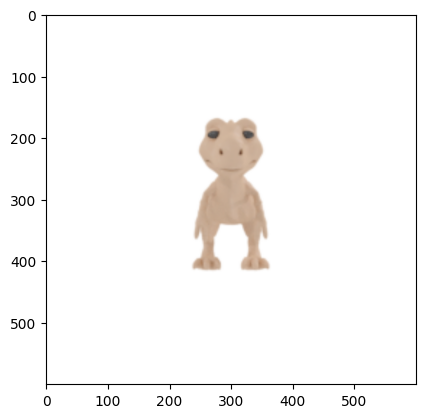

torch.Size([3, 300, 300])


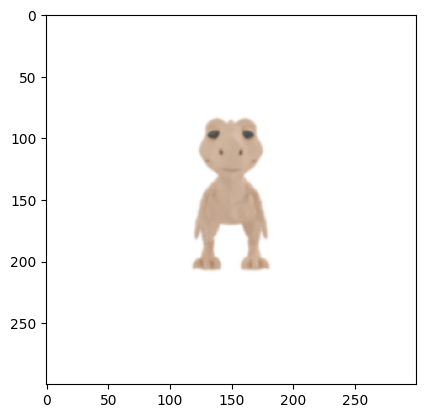

RuntimeError: The size of tensor a (300) must match the size of tensor b (600) at non-singleton dimension 2

In [3]:
## DEBUG Resizing
import sys
sys.path.insert(0, "/home/ubuntu/kiva-iccv/kiva-iccv")
from utils.dataset.transformations_kiva_adults import apply_resizing_original, apply_resizing
from on_the_fly_dataset import OnTheFlyKiVADataset

DATA_DIR = "/home/ubuntu/kiva-iccv/data/KiVA/untransformed objects"
kiva_dataset = OnTheFlyKiVADataset(
    data_dir=DATA_DIR,
    distribution_config={"kiva-functions-Resizing": 1},
    epoch_length=100,  # smaller epoch for quick demo
)


img = kiva_dataset._load_random_images(1, ["Resizing"])[0]

# sizes and display
print(img.shape)
# display
import matplotlib.pyplot as plt
plt.imshow(img.permute(1, 2, 0))
plt.show()

# apply resizing
out, _, _ = apply_resizing(img, "0.5XY", "train")

print(out.shape)
# display
plt.imshow(out.permute(1, 2, 0))
plt.show()
import torch
# Since torch.allclose is False, let's print how they are different.
# Shapes are the same, so plot the vector of differences.
diff = (out.float() - img.float())
plt.imshow(diff.permute(1, 2, 0))

Dataset Initialized. An epoch will consist of 100 generated samples.
torch.Size([3, 600, 600])


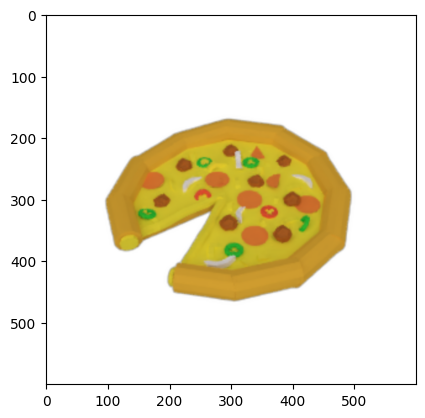

TypeError: apply_rotation() got an unexpected keyword argument 'initial_rotation'

In [10]:
## DEBUG Rotation
if apply_rotation in sys.modules:
    del sys.modules["apply_rotation"]
import sys
sys.path.insert(0, "/home/ubuntu/kiva-iccv/kiva-iccv")
from utils.dataset.transformations_kiva_adults import apply_rotation
from on_the_fly_dataset import OnTheFlyKiVADataset

DATA_DIR = "/home/ubuntu/kiva-iccv/data/KiVA/untransformed objects"
kiva_dataset = OnTheFlyKiVADataset(
    data_dir=DATA_DIR,
    distribution_config={"kiva-functions-Rotation": 1},
    epoch_length=100,  # smaller epoch for quick demo
)

img = kiva_dataset._load_random_images(1, ["Rotation"])[0]

# sizes and display
print(img.shape)
# display
import matplotlib.pyplot as plt
plt.imshow(img.permute(1, 2, 0))
plt.show()

# apply rotation with angle "+0"
original_img, rotated_img, start_angle, correct_angle = apply_rotation(img, "+45", type="train", initial_rotation="+0")

rotated_img = img
print(rotated_img.shape)
# display
plt.imshow(rotated_img.permute(1, 2, 0))
plt.show()

import torch
# Since torch.allclose is False, let's print how they are different.
# Shapes are the same, so plot the vector of differences.
diff = (rotated_img.float() - img.float())
plt.imshow(diff.permute(1, 2, 0))